# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 5: Weryfikacja hipotez statystycznych (Notatnik 1/2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [3]:
# Dane do testów
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["x"])
test_data_1.head()

,x
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [4]:
# Dane do testów
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=-0.15, scale=0.2, size=100, random_state=12)>0, columns=["x"])
test_data_2.head()

,x
0,False
1,False
2,False
3,False
4,True


### Zadanie 1: Weryfikacja hipotezy o wartości przeciętnej [10 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki t.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk t i t_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku t i t_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: μ = 5`</br>
    `H1: μ ≠ 5`</br>
    `t = -0.0170, t_alpha = 2.1448`</br>
    `|t| < t_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [4]:
def mean_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej.
    H0: float
        Wartość przeciętna przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna jest różna od wartości przyjętej w H0,
        - less: wartość przeciętna jest mniejsza od wartości przyjętej w H0,
        - greater: wartość przeciętna jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    x = np.arange(sp.stats.t.ppf(0.0001, 10),sp.stats.t.ppf(0.9999, 10),0.01)
    s=np.sqrt(sum((data.x-data.x.mean())**2)/len(data))
    t=(data.x.mean()-H0)/s*np.sqrt(len(data)-1)
    if H1=="two-sided":
        t_alpha=sp.stats.t.ppf(1-alpha/2,len(data)-1)
        H=abs(t)>=t_alpha
        cond=abs(x)>=t_alpha
        H1_str="μ ≠"
        res_str ="|t| >= t_alpha" if H==1 else "|t| < t_alpha"
    elif H1=="less":
        t_alpha=sp.stats.t.ppf(alpha,len(data)-1)
        H=t<=t_alpha
        cond=x<=t_alpha
        H1_str="μ <"
        res_str ="t <= t_alpha" if H==1 else "t > t_alpha"

    else:
        t_alpha=sp.stats.t.ppf(1-alpha,len(data)-1)
        H=t>=t_alpha
        cond=x>=t_alpha
        H1_str="μ >"
        res_str ="t >= t_alpha" if H==1 else "t < t_alpha"
    
    res = "daje podstawy" if H else "nie daje podstaw"
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    y=sp.stats.t.pdf(x,10)
    ax.plot(x, y)
    #ax.set_xlim([r1,r2])
    ax.fill_between(x,y,where=cond)
    
    ax.set_title(f"H0: μ = {H0}\nH1:{H1_str}{H0}\nt = {t:.4f}, t_alpha = {t_alpha:.4f}\n{res_str}\nWynik testu istotności {res} do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}")
    ax.vlines(t, 0, max(y)/3, color='r')
    plt.show()
    
    return [t,t_alpha,H]


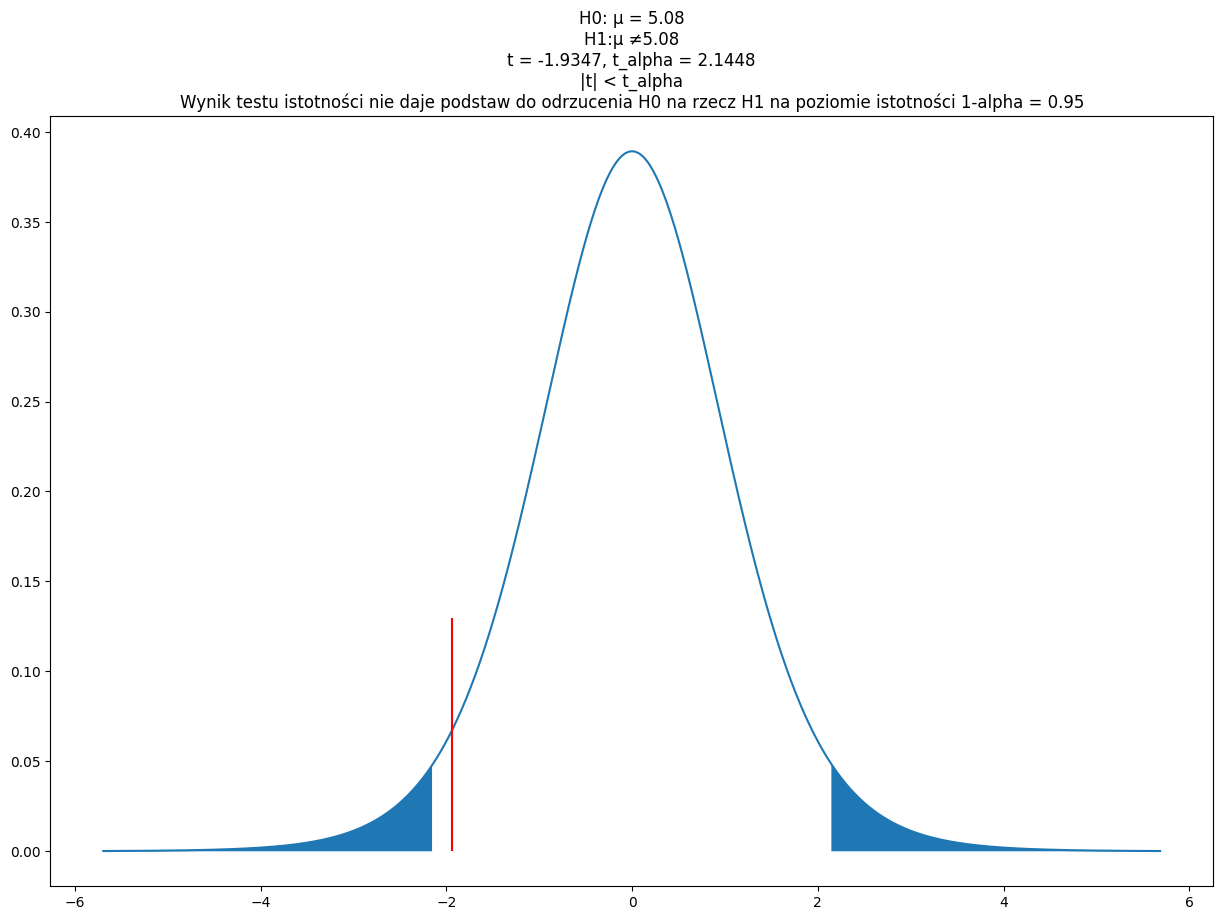

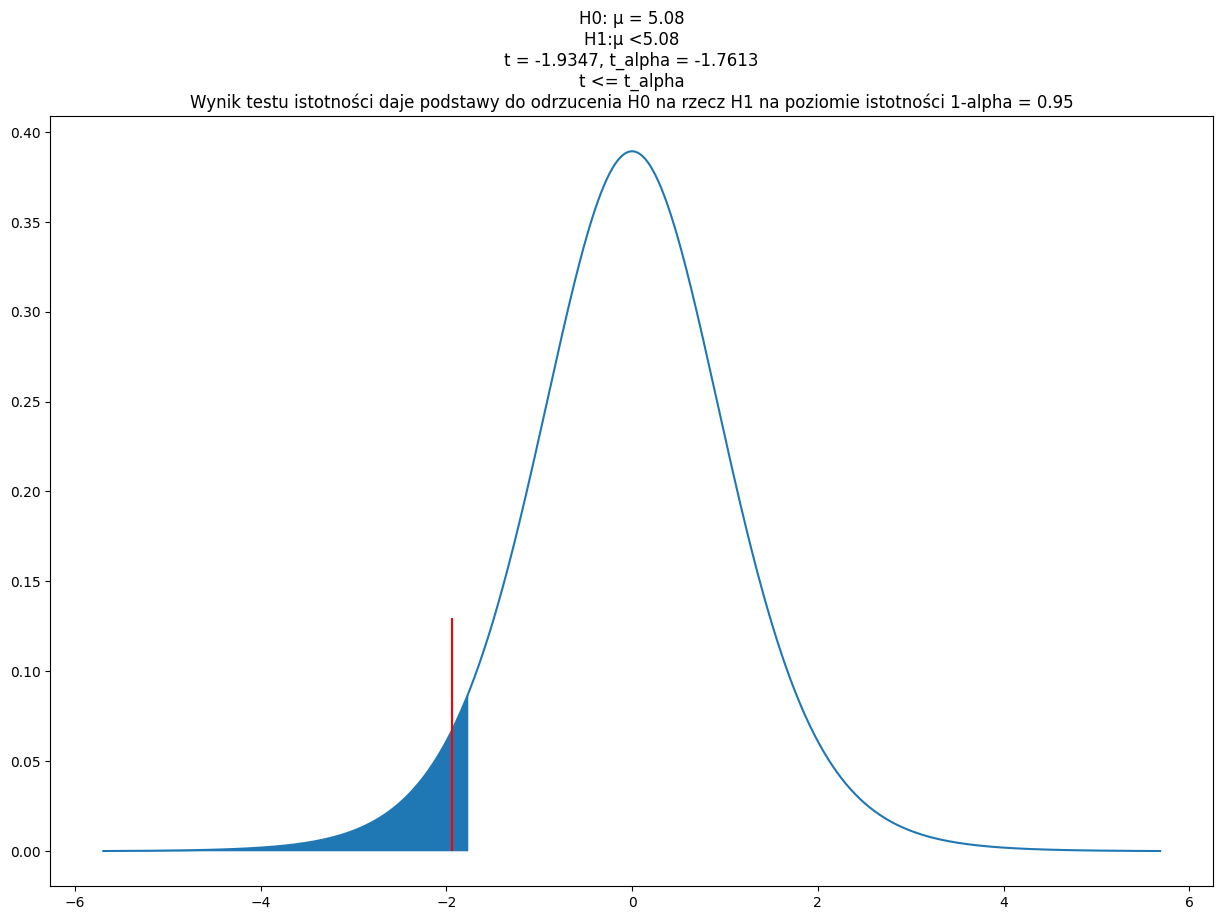

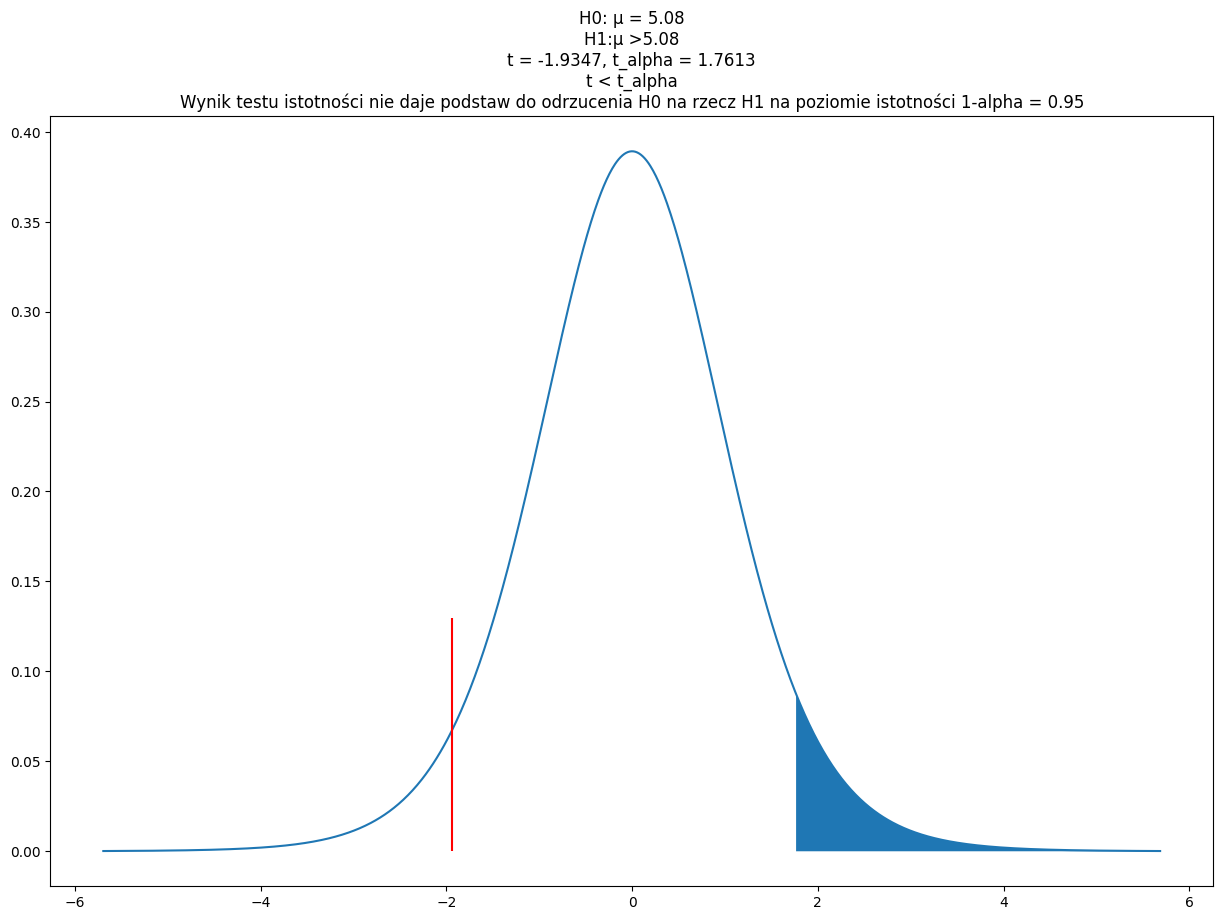

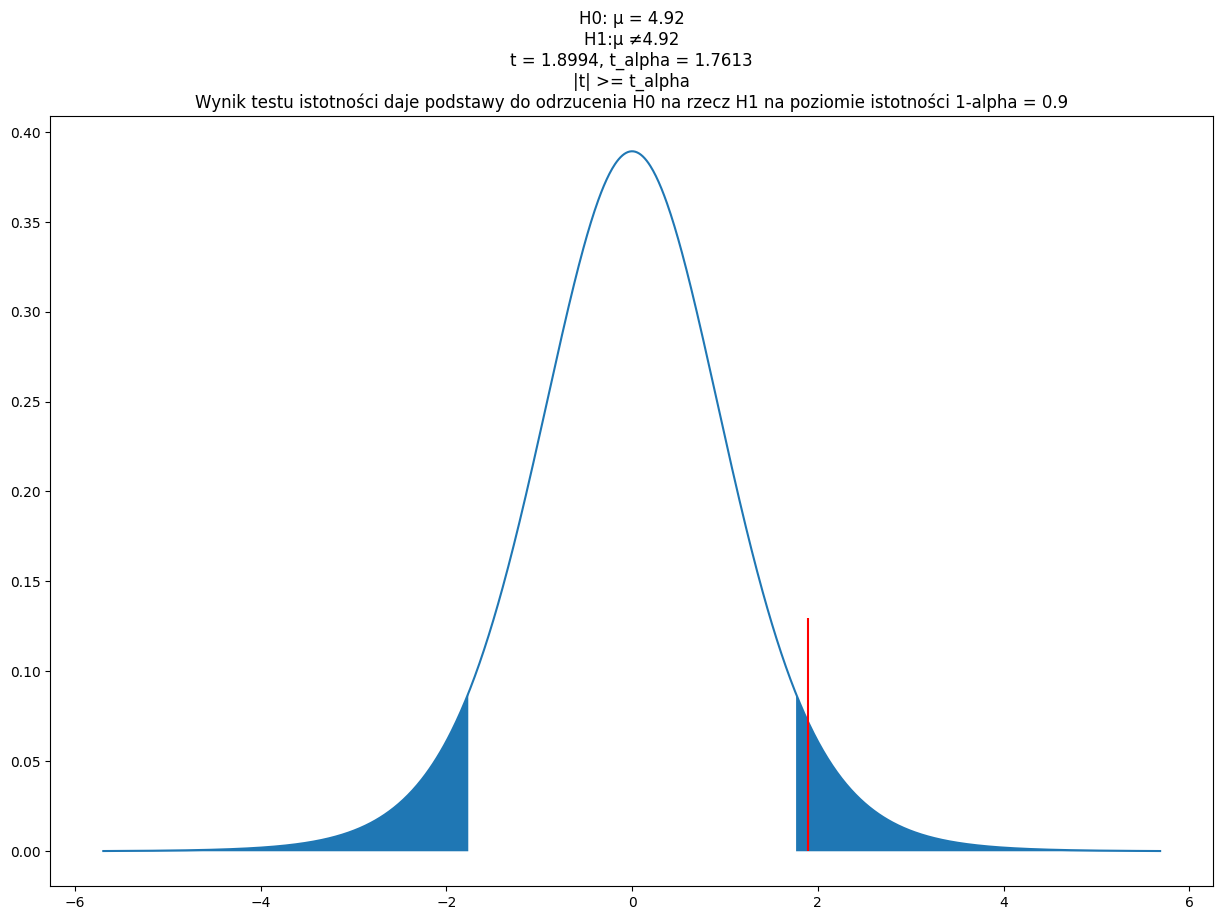

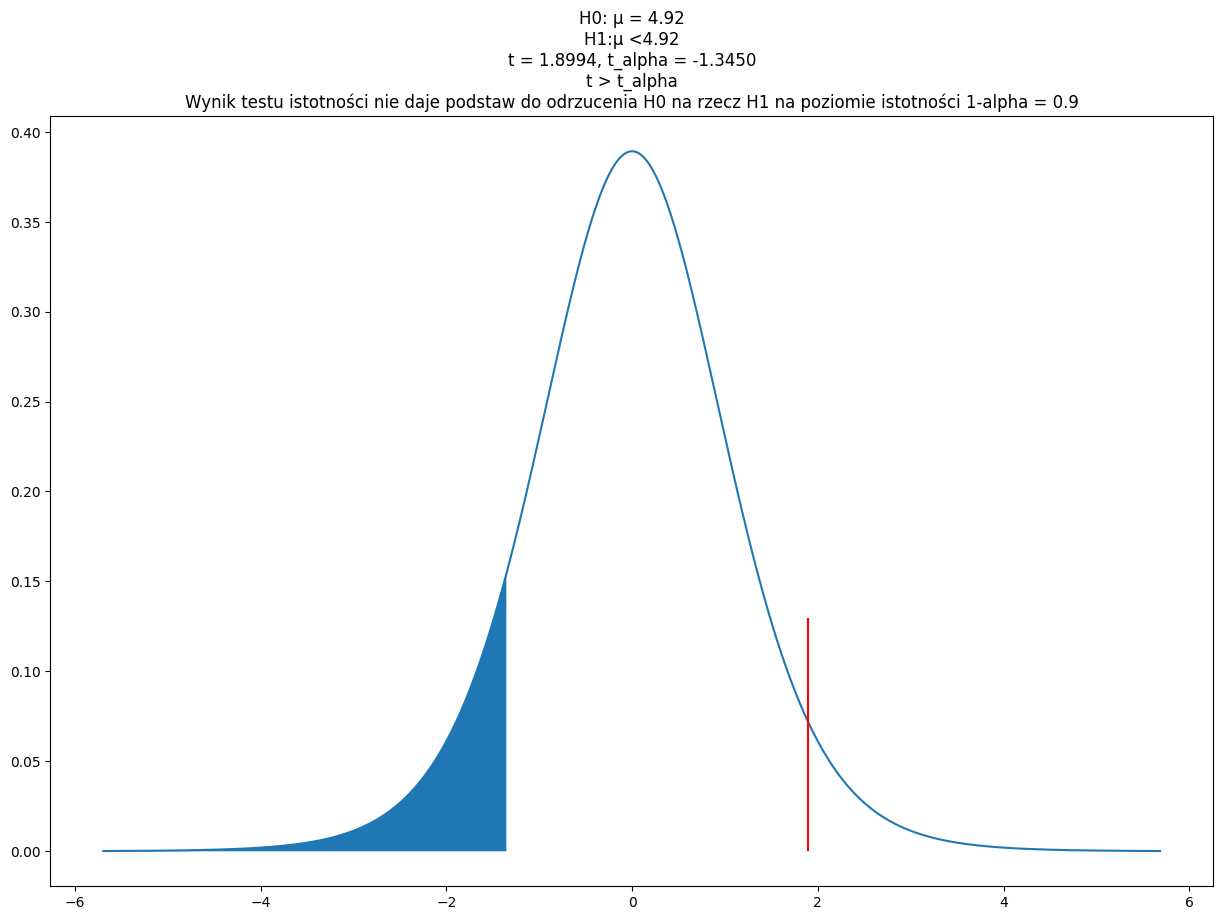

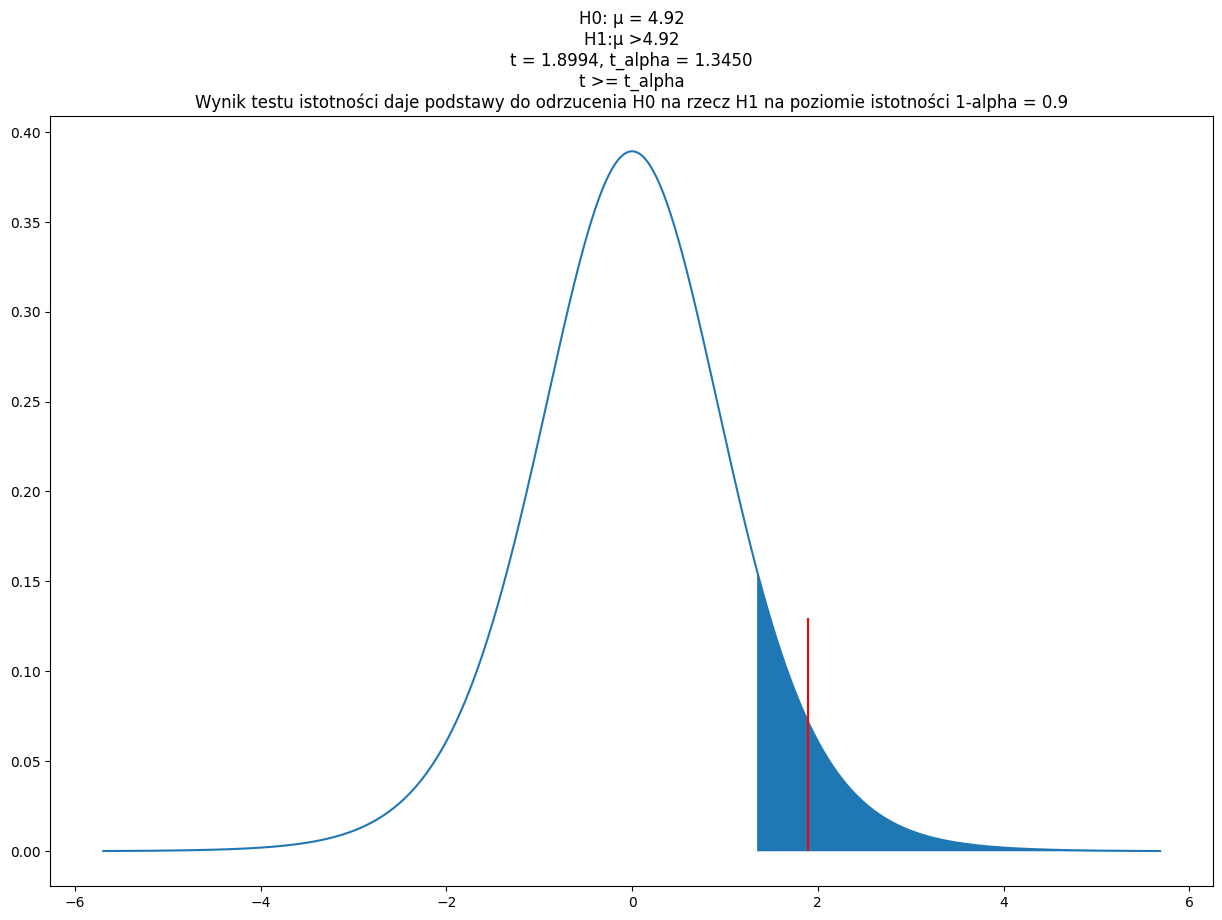

In [5]:
### Komórka testowa

assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "two-sided", 0.05), (-1.9346677837081263, 2.1447866879169273, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "less", 0.05), (-1.9346677837081263, -1.7613101357748564, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "greater", 0.05), (-1.9346677837081263, 1.7613101357748562, 0)))

assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "two-sided", 0.1), (1.8994107469740968, 1.7613101357748562, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "less", 0.1), (1.8994107469740968, -1.3450303744546486, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "greater", 0.1), (1.8994107469740968, 1.345030374454649, 1)))

### Zadanie 2: Weryfikacja hipotezy o wariancji [10 pkt]

Przygotuj funkcję `variance_NHST()`, która będzie weryfikować hipotezę o wartości wariancji i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki chi2.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk chi2 i chi2_alpha lub chi2, chi2_alpha_1 i chi2_alpha_2 (w zależności od postaci obszaru krytycznego),
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku chi2, chi2_alpha, chi2_alpha_1 i chi2_alpha_2, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: s^2 = 25`</br>
    `H1: s^2 > 25`</br>
    `chi2 = 40.0000, chi2_alpha = 30.1435`</br>
    `chi2 <= chi2_alpha`</br>
    `Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [42]:
def variance_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej.
    H0: float
        Wariancji przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wariancja jest różna od wartości przyjętej w H0,
        - less: wariancja jest mniejsza od wartości przyjętej w H0,
        - greater: wariancja jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    chi2: float
        Wyliczona na podstawie próby losowej wartość statystyki chi2.
    chi2_alpha: float or list
        Wartość statystyki chi2_alpha lub lista z dwoma wartościami chi2_alpha_1 i chi2_alpha_2
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    x = np.arange(sp.stats.chi2.ppf(0.0001, len(data)-1),sp.stats.chi2.ppf(0.9999, len(data)-1),0.001)
    s2=sum((data.x-data.x.mean())**2)/len(data)
    chi2=len(data)*s2/H0
    cond2=False
    if H1=="two-sided":
        chi2_alpha_1=sp.stats.chi2.ppf(alpha/2,len(data)-1)
        chi2_alpha_2=sp.stats.chi2.ppf(1-alpha/2,len(data)-1)
        cond=x<=chi2_alpha_1 
        cond2=x>=chi2_alpha_2
        H1_str="s^2 ≠"
        H=chi2<=chi2_alpha_1 or chi2>chi2_alpha_2
        res2 = "daje podstawy" if H else "nie daje podstaw"
        if  not H:
            if chi2>=chi2_alpha_1:
                res_str="chi2>=chi2_alpha_1"
            else: 
                res_str="chi2 <= chi2_alpha_2"
        elif chi2 <=chi2_alpha_1:
            res_str="chi2 <=chi2_alpha_1"
        else:
            res_str="chi2 >=chi2_alpha_2"
                   
        wyn_str=f"H0: s^2 = {H0}\nH1:{H1_str} {H0}\nchi2 = {chi2:.4f}, chi2_alpha_1 = {chi2_alpha_1:.4f}, chi2_alpha_2 = {chi2_alpha_2:.4f}\n{res_str}\nWynik testu istotności {res2} do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"
        res=[chi2,[chi2_alpha_1,chi2_alpha_2],H]
    if H1=="less":
        chi2_alpha=sp.stats.chi2.ppf(alpha,len(data)-1)
        H=chi2<=chi2_alpha
        cond=x<=chi2_alpha 
        res_str ="chi2 <= chi2_alpha" if H==1 else "chi2  >= chi2_alpha"
        H1_str="s^2 <"
        res= [chi2,chi2_alpha,H]
        
    if H1=="greater":
        chi2_alpha=sp.stats.chi2.ppf(1-alpha,len(data)-1)
        H=chi2>=chi2_alpha
        cond=x>=chi2_alpha
        H1_str="s^2 >"
        res_str ="chi2 >= chi2_alpha" if H==1 else "chi2 <= chi2_alpha"
        res= [chi2,chi2_alpha,H]
        
    
    y=sp.stats.chi2.pdf(x,len(data)-1)
    res2 = "daje podstawy" if H else "nie daje podstaw"
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    ax.plot(x, y)
    ax.fill_between(x,y,where=(cond) | (cond2))
    if H1!="two-sided":
        ax.set_title(f"H0: s^2 = {H0}\nH1: {H1_str} {H0}\nchi2 = {chi2:.4f}, chi2_alpha = {chi2_alpha:.4f}\n{res_str}\nWynik testu istotności {res2} do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}")
    else: 
        ax.set_title(wyn_str)
    ax.vlines(chi2, 0, max(y)/3, color='r')
    plt.show()
    
    
    return res
    


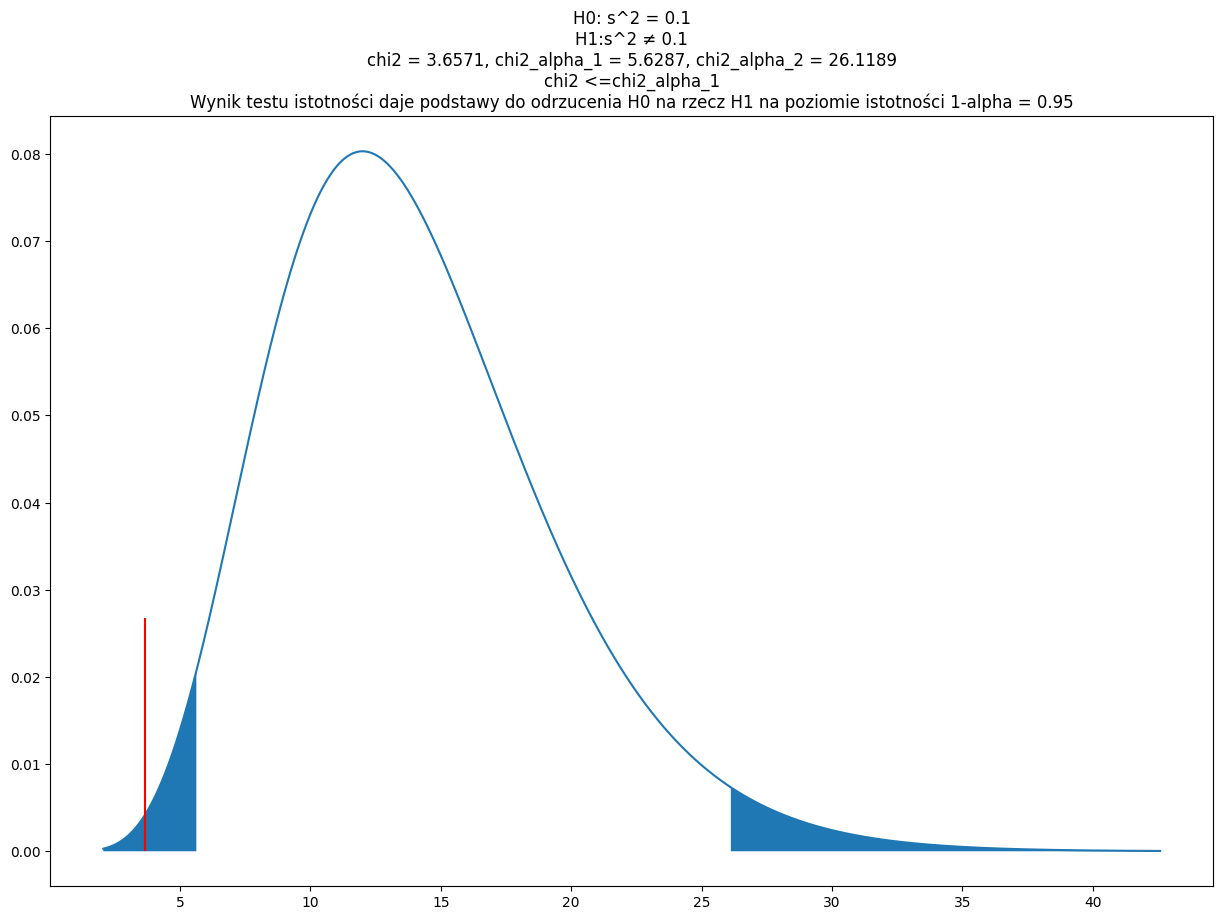

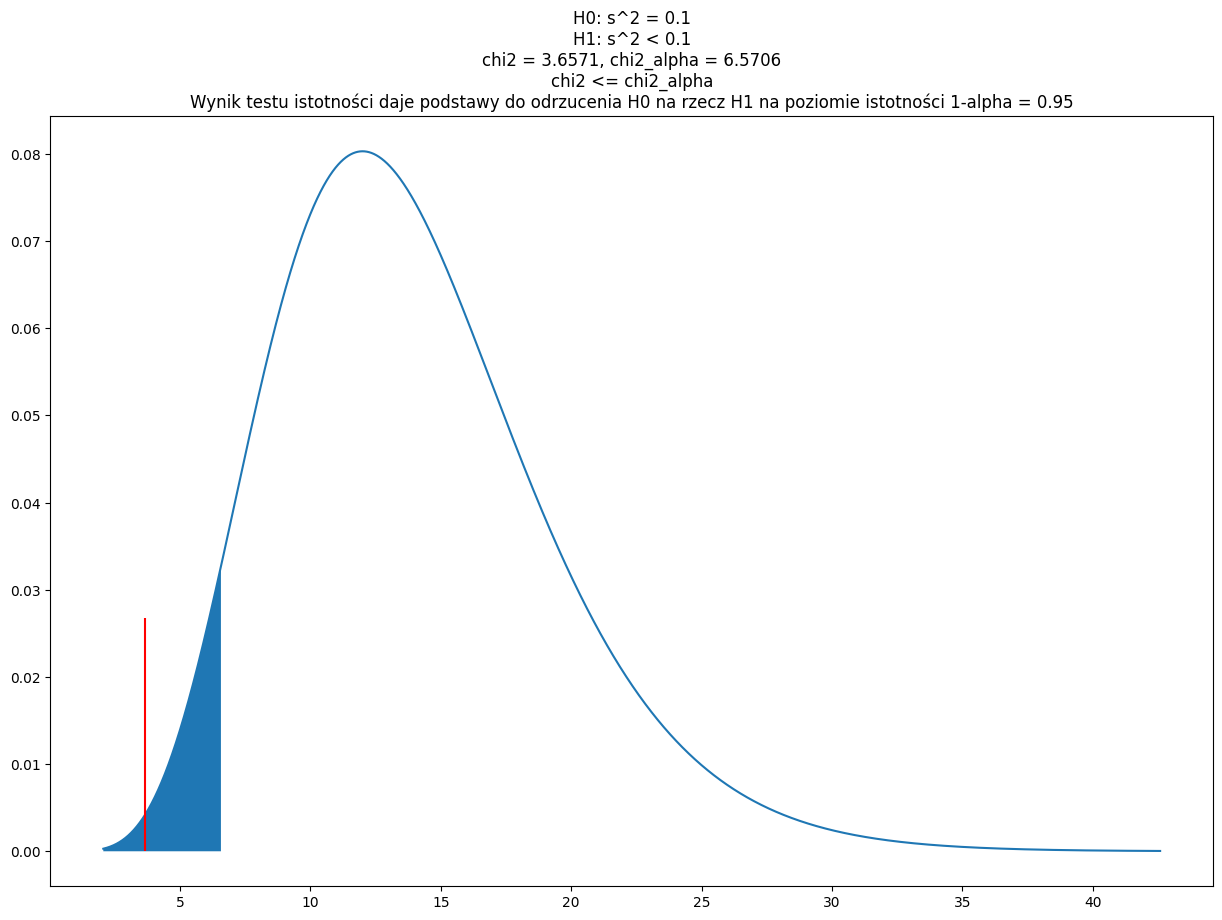

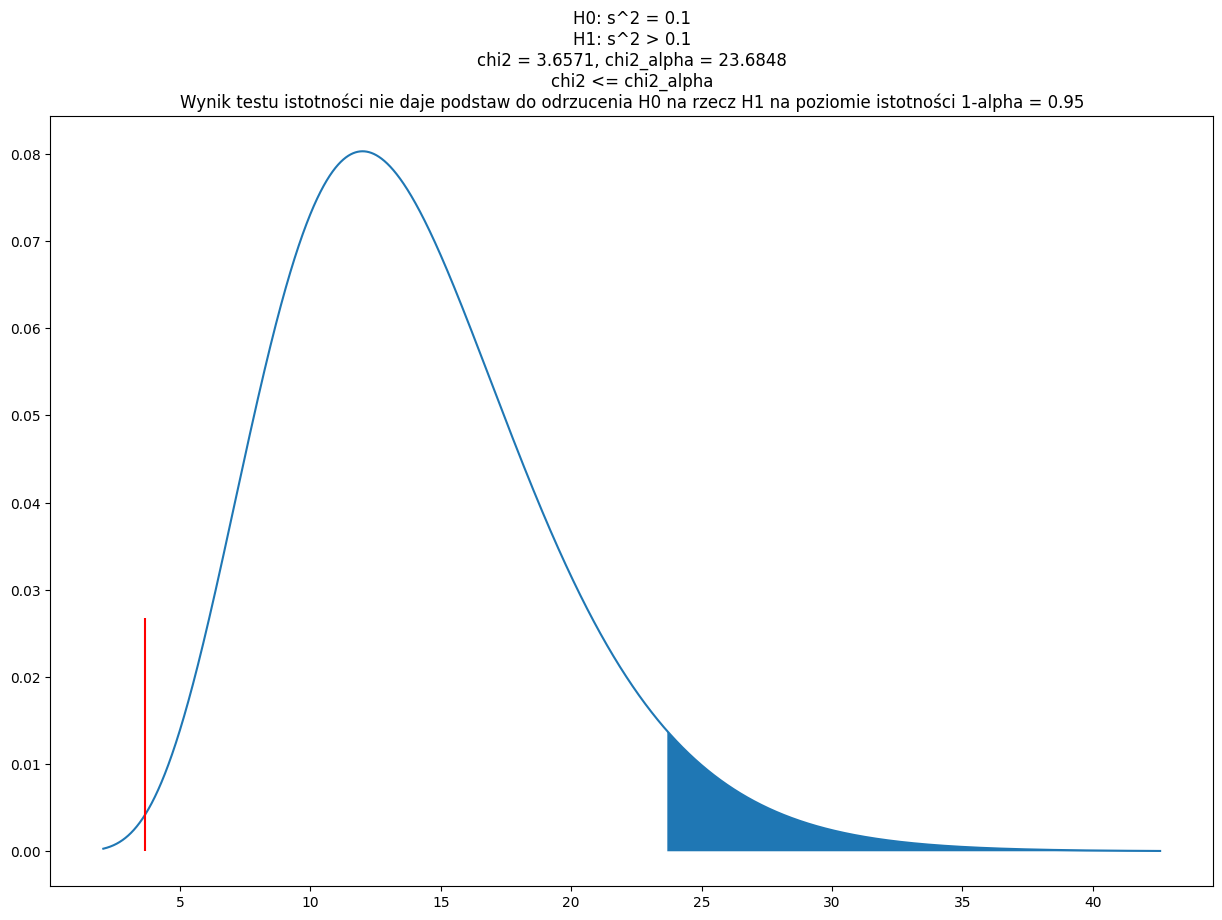

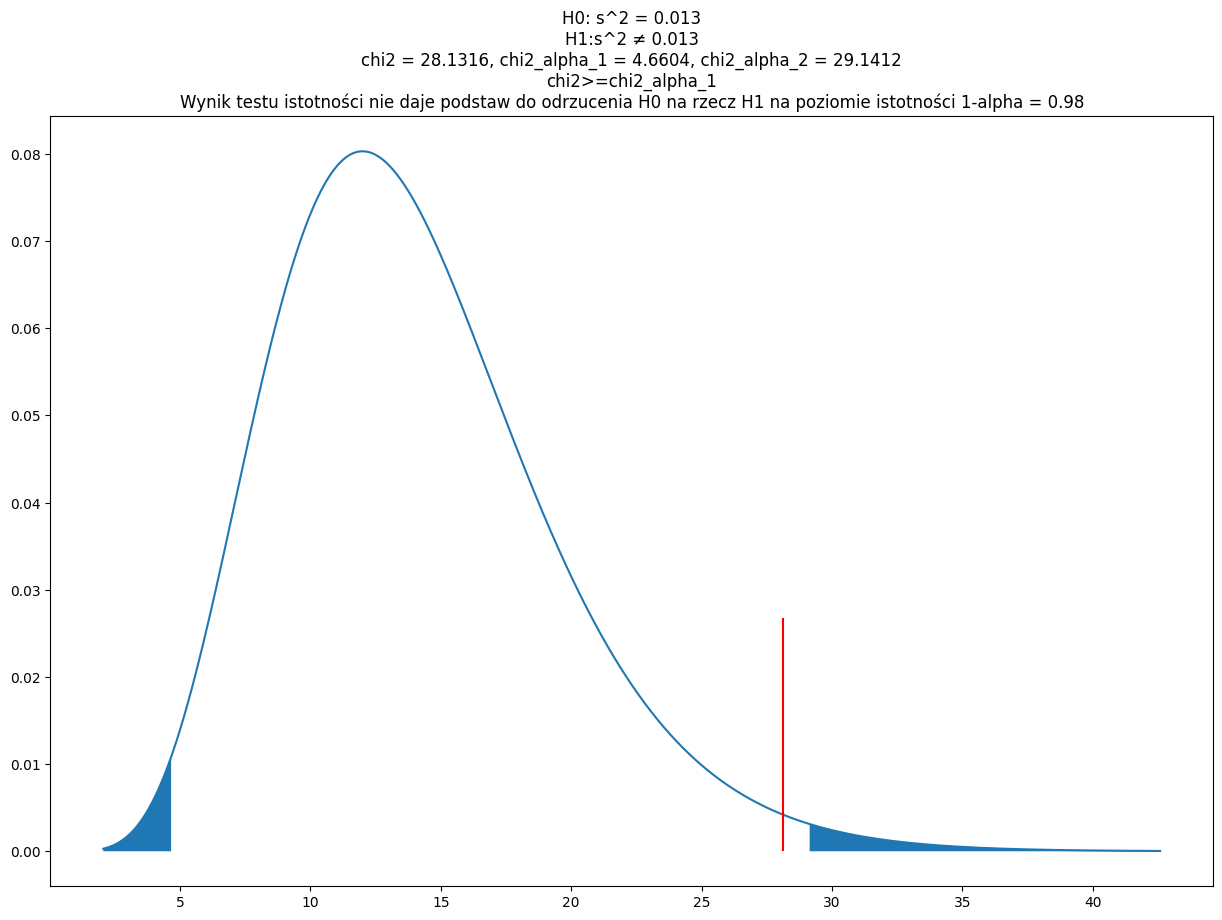

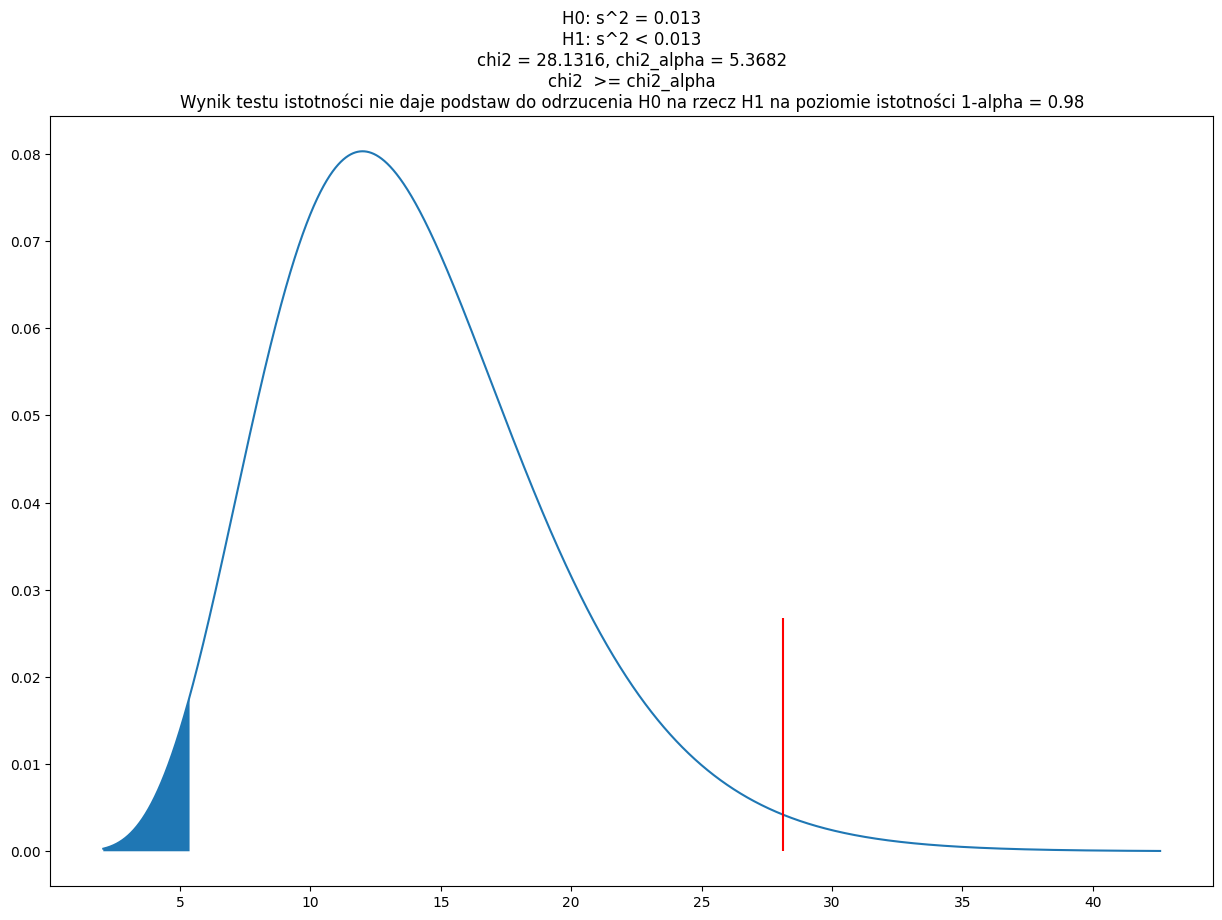

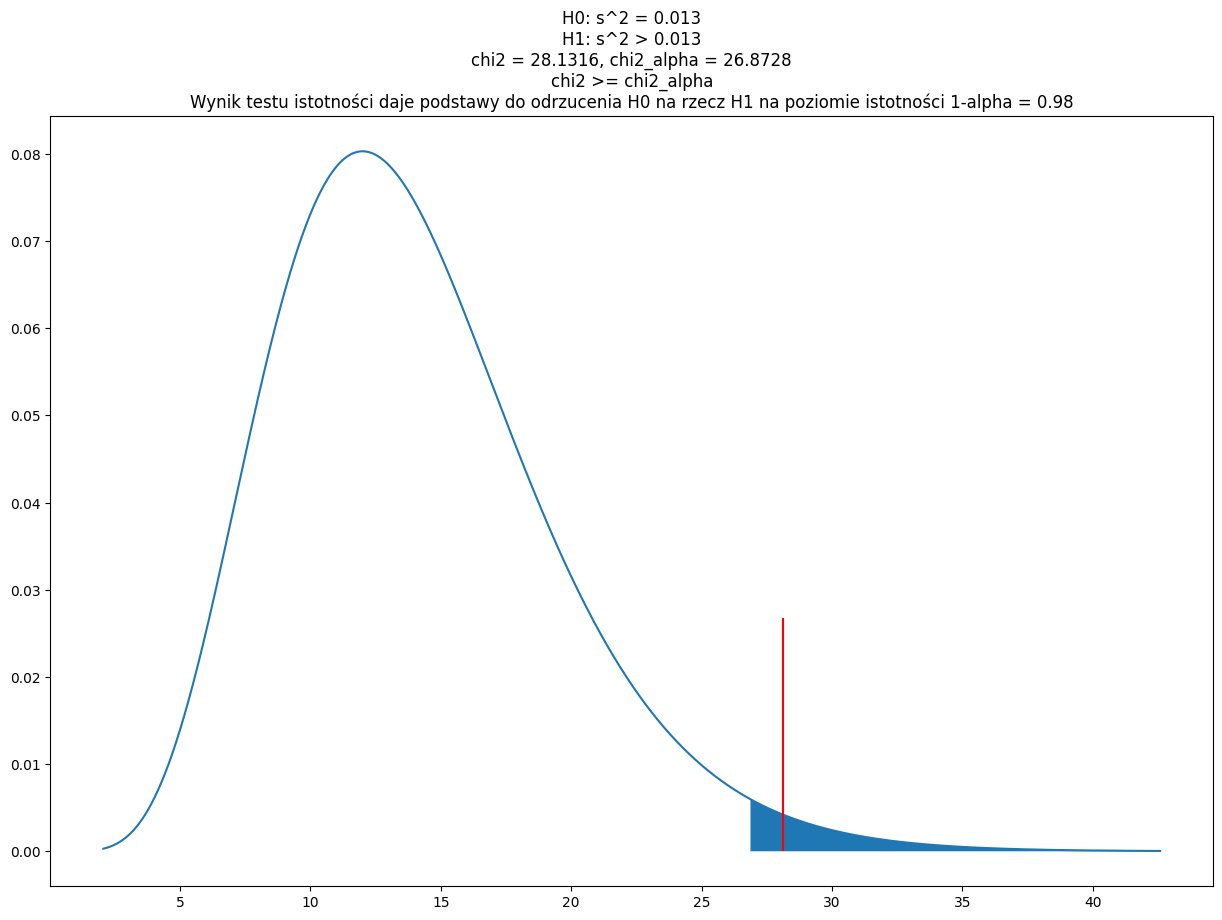

In [43]:
### Komórka testowa

results = variance_NHST(test_data_1, 0.1, "two-sided", 0.05)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (3.657103504858619, 5.628726103039731, 26.11894804503737, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "less", 0.05), (3.657103504858619, 6.570631383789345, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "greater", 0.05), (3.657103504858619, 23.684791304840576, 0)))

results = variance_NHST(test_data_1, 0.013, "two-sided", 0.02)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (28.13156542198938, 4.660425062657768, 29.141237740672796, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "less", 0.02), (28.13156542198938, 5.368197419889671, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "greater", 0.02), (28.13156542198938, 26.872764642314312, 1)))

### Zadanie 3: Weryfikacja hipotezy o wskaźniku struktury (proporcji) [10 pkt]

Przygotuj funkcję `proportion_NHST()`, która będzie weryfikować hipotezę o wartości wskaźnika struktury (proporcji) i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki u.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk u i u_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku u i u_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: p = 0.3`</br>
    `H1: p > 0.3`</br>
    `u = 1.0494, u_alpha = 1.6449`</br>
    `u < u_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [56]:
def proportion_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej (True, False).
    H0: float
        Wartość wskaźnika struktury przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość wskaźnika struktury jest różna od wartości przyjętej w H0,
        - less: wartość wskaźnika struktury jest mniejsza od wartości przyjętej w H0,
        - greater: wartość wskaźnika struktury jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby losowej wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    x = np.arange(sp.stats.norm.ppf(0.0001),sp.stats.norm.ppf(0.9999),0.001)
    p=(data==True).astype(int).sum()/len(data)
    u=((p-H0)/np.sqrt(H0*(1-H0)/len(data)))[0]   
    if H1=="two-sided":
        u_alpha=sp.stats.norm.ppf(1-alpha/2)
        H=abs(u)>=u_alpha
        cond=abs(x)>=u_alpha
        H1_str="p ≠"
        res= [u,u_alpha,H]
        res_str ="|u| >= u_alpha" if H==1 else "|u| < u_alpha"
    if H1=="less":
        u_alpha=sp.stats.norm.ppf(alpha)
        H=u<=u_alpha
        cond=x<=u_alpha
        H1_str="p <"
        res_str ="u <= u_alpha" if H==1 else "u > u_alpha"
        res= [u,u_alpha,H]
    if H1=="greater":
        u_alpha=sp.stats.norm.ppf(1-alpha)
        H=u>=u_alpha
        cond=x>=u_alpha
        res_str ="u >= u_alpha" if H==1 else "u < u_alpha"
        H1_str="p >"
        res= [u,u_alpha,H]
    
    y=sp.stats.norm.pdf(x)
    res2 = "daje podstawy" if H else "nie daje podstaw"
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    ax.plot(x, y)
    ax.fill_between(x,y,where=cond)
    ax.set_title(f"H0: p = {H0}\nH1: {H1_str} {H0}\nu = {u:.4f}, u_alpha = {u_alpha:.4f}\n{res_str}\nWynik testu istotności {res2} do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}")
    ax.vlines(u, 0, max(y)/3, color='r')
    plt.show()
    return res
    # YOUR CODE HERE
    #raise NotImplementedError()



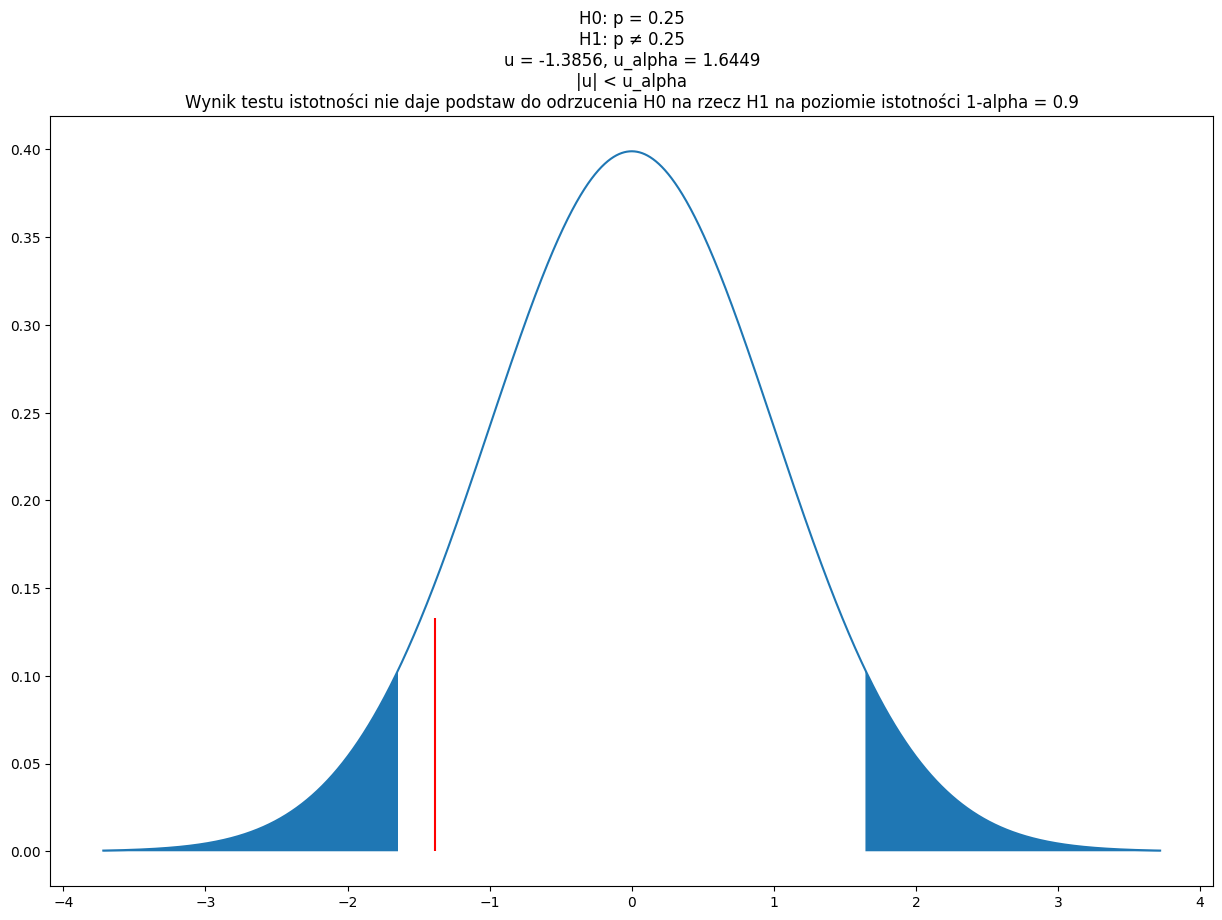

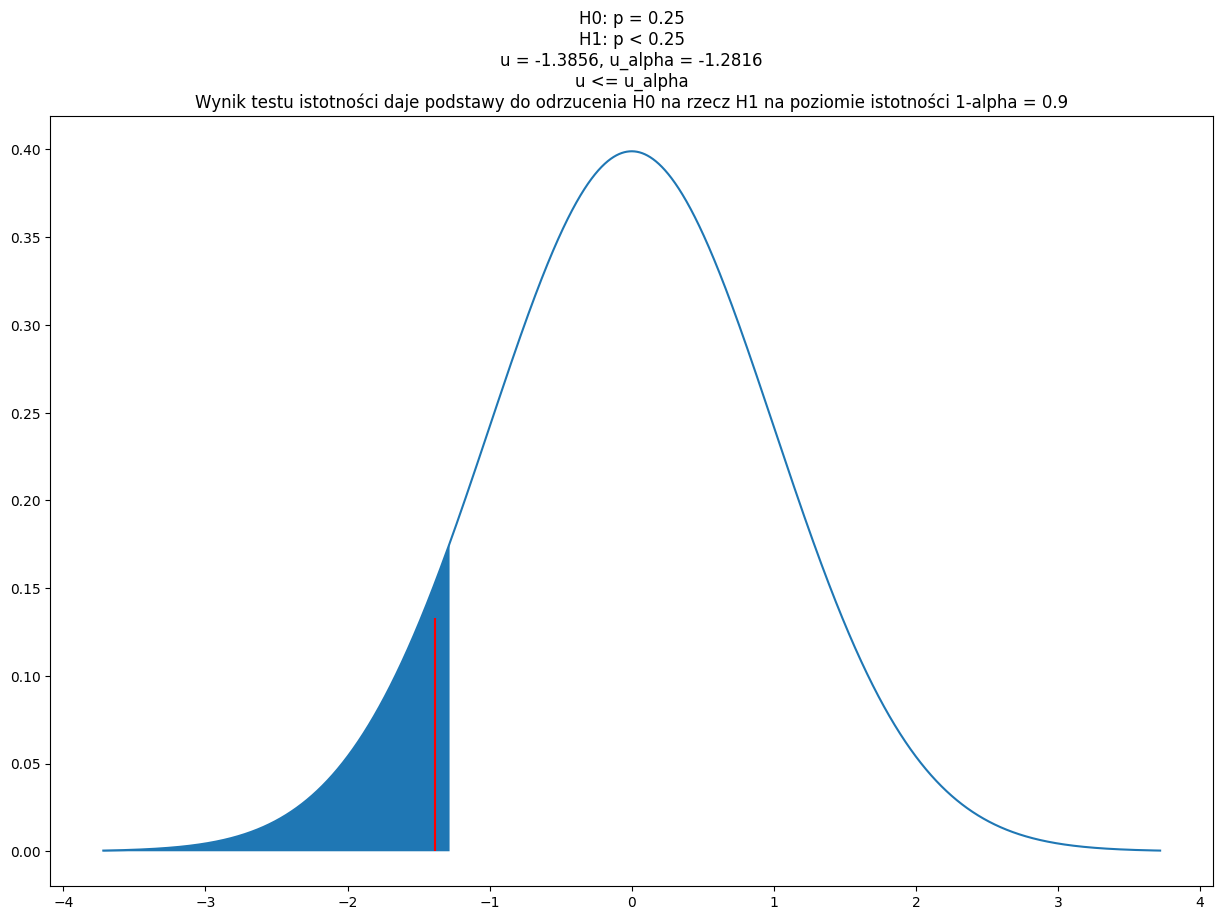

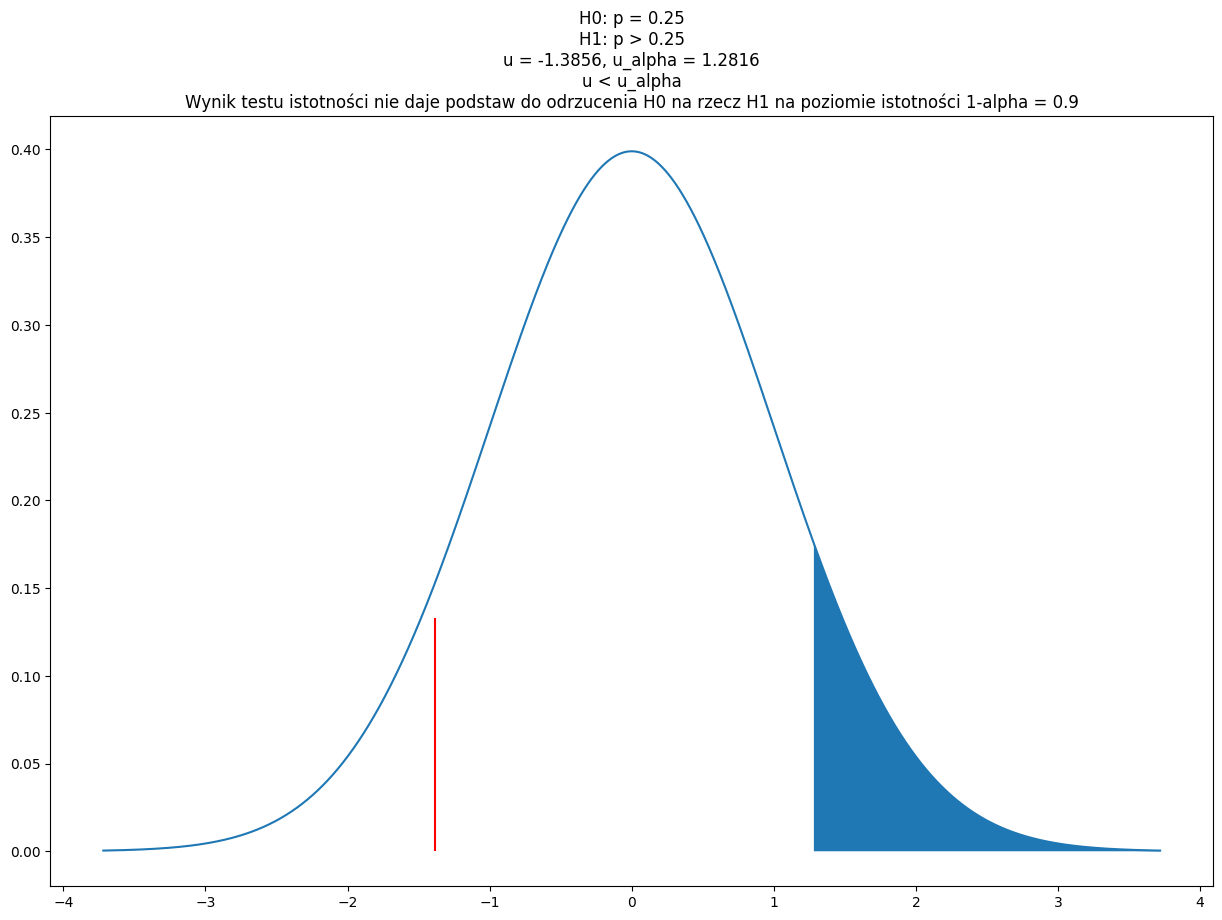

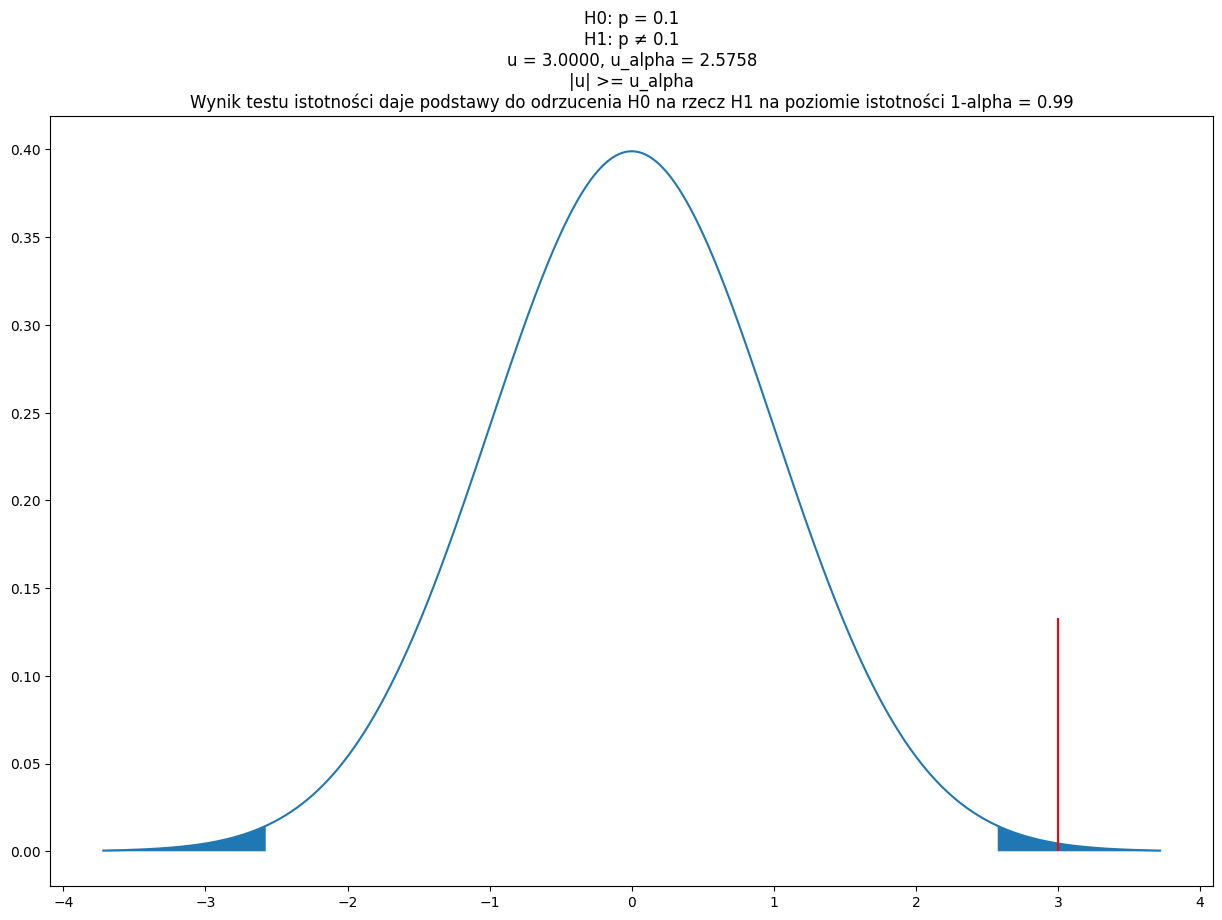

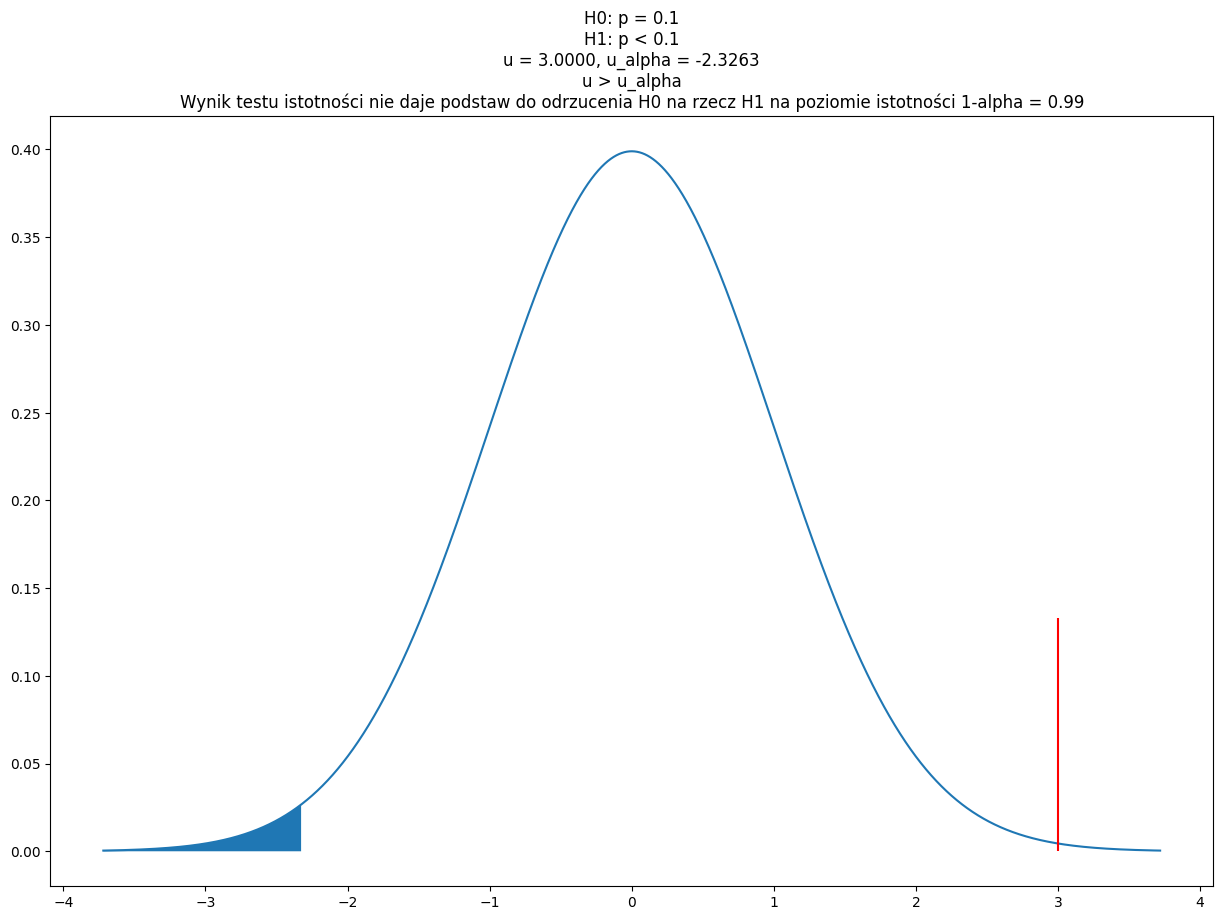

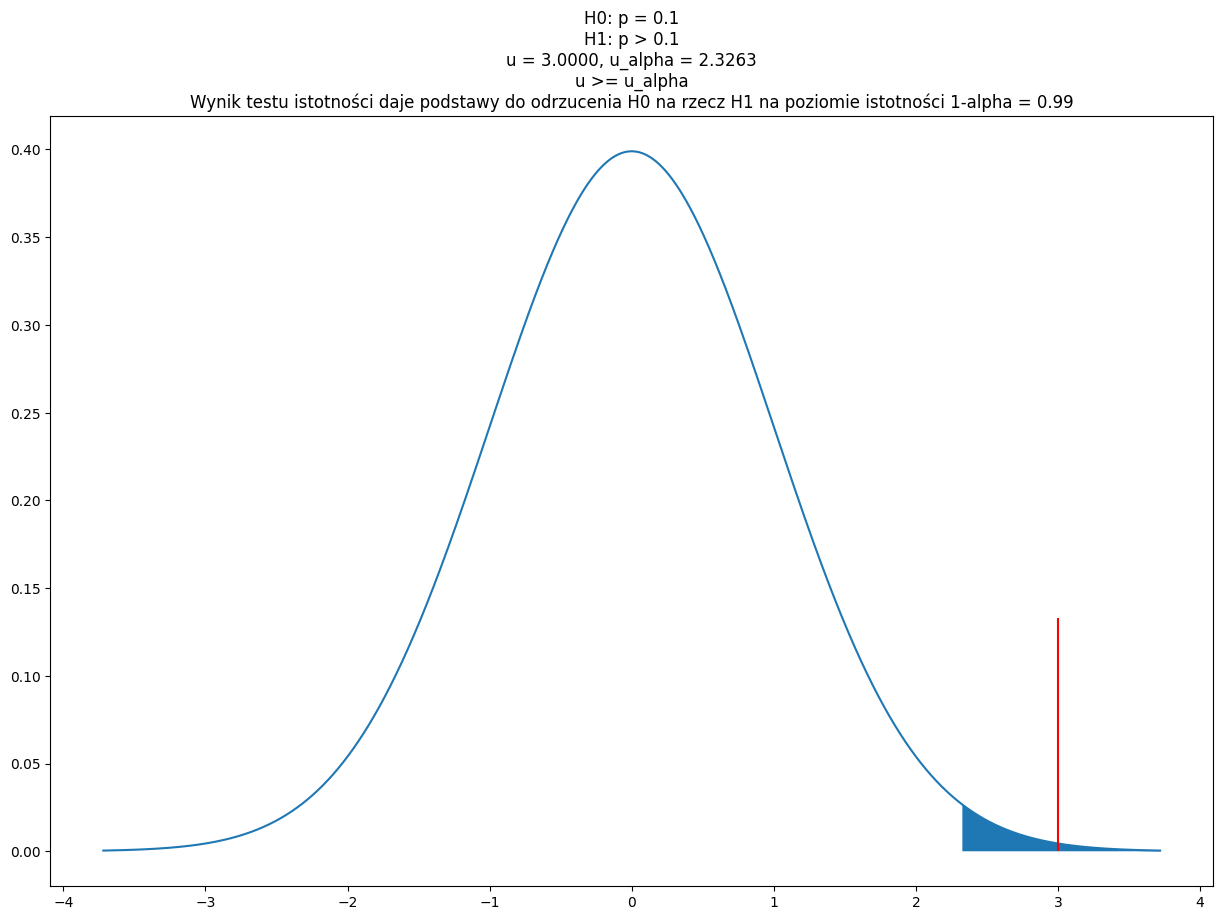

In [57]:
### Komórka testowa
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "two-sided", 0.1), (-1.3856406460551018, 1.6448536269514722, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "less", 0.1), (-1.3856406460551018, -1.2815515655446004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "greater", 0.1), (-1.3856406460551018, 1.2815515655446004, 0)))

assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "two-sided", 0.01), (2.9999999999999996, 2.5758293035489004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "less", 0.01), (2.9999999999999996, -2.3263478740408408, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "greater", 0.01), (2.9999999999999996, 2.3263478740408408, 1)))